<a href="https://colab.research.google.com/github/Huy1902/HAC/blob/main/Movie_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
!pip install tabml --quiet

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 59.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.2/305.2 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 73.2 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 74.6 MB/s eta 0:00:00:00:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cartopy 0.24.1 requires numpy>=1.23, but you have numpy 1.22.4 which is incompatible.
albucore 0.0.19 requires numpy>=1.24.4, but you have numpy 1.22.4 which is incompatible.
albumentations 1.4.20 requires numpy>=1.24.4, but you have numpy 1.22.4 w

In [ ]:
import tabml.datasets
df_dict = tabml.datasets.download_movielen_1m()
df_dict.keys()

dict_keys(['users', 'movies', 'ratings'])

In [ ]:
ratings = df_dict["ratings"]
ratings.head(10)

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
5,1,1197,3,978302268
6,1,1287,5,978302039
7,1,2804,5,978300719
8,1,594,4,978302268
9,1,919,4,978301368


<Axes: ylabel='Frequency'>

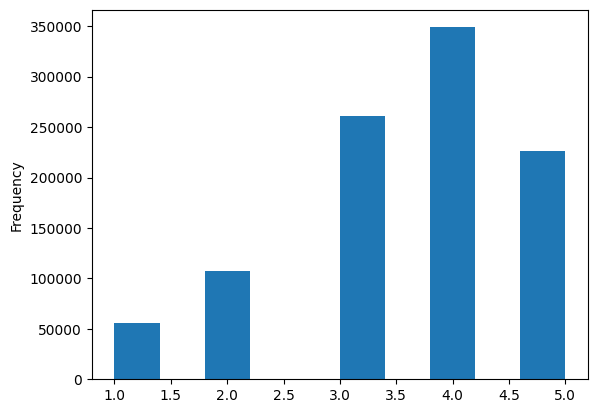

In [ ]:
ratings["Rating"].plot.hist()

In [ ]:
users = df_dict['users']
movies = df_dict['movies']
ratings = df_dict['ratings']
users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [ ]:
movies.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
ratings.head()

In [ ]:
movie_rating = ratings.merge(movies, on='MovieID', how='left')
movie_rating.head()

,UserID,MovieID,Rating,Timestamp,Title,Genres
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance
3,1,3408,4,978300275,Erin Brockovich (2000),Drama
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy


## Data extraction and Loading

In [ ]:
from tqdm import tqdm  # ✅ Correct import
import random

a = [random.randint(1, 100) for _ in range(100)]
for i, u in enumerate(tqdm(a)):
    pass

100%|██████████| 100/100 [00:00<00:00, 683111.40it/s]


In [ ]:
class DataGenerator():

    def __init__ (self):
        self.mr = movie_rating.head()
        self.users = self.mr['UserID'].unique()
        self.movie = self.mr['MovieID'].unique()
        self.hist = self.generate_history_function()

    def generate_history_function(self):
        '''
        Group all rates given by users ad store them from older to most recent based on time
        '''
        historic_users = []
        for i, u in enumerate(tqdm(self.users)):
            movie_watched = self.mr[self.mr['UserID'] == u]
            movie_watched = movie_watched.sort_values('Timestamp').reset_index(drop=True)
            historic_users.append(movie_watched)

        return historic_users
    def sample_history(self, user_hist, action_ratio=0.8, max_samp_by_user=5, max_state=100,
                       max_action=50, n_states=[], n_actions=[])
        '''
        Making multiple samples for a given historic set, based on some number of states and actions
        '''

        n = len(user_hist)
        sep = int(action_ration * n)
        n_sample = random.randin(1, max_samp_by_user)
        if not n_staets:
            n_states = [min(random.randint(1, sep), max_state), for _ in range(n_sample)]
        if not n_actions:
            n_actions = [min(random.randint(1, n - sep), max_action) for _ in range(n_sample)]

        assert len(n_states) == len(n_actions), 'Must have same size'

        states = []
        actions = []

        for i in range(len(n_states)):
            sample_states = user_hist.iloc[0:sep].sample(n_states[i])
            sample_actions = user_hist.iloc[-(n-sep):].sample(n_actions[i])


In [ ]:
generator = DataGenerator()
generator.generate_history_function()

100%|██████████| 1/1 [00:00<00:00, 428.69it/s]


[   UserID  MovieID  Rating  Timestamp                                   Title  \
 0       1     3408       4  978300275                  Erin Brockovich (2000)   
 1       1     1193       5  978300760  One Flew Over the Cuckoo's Nest (1975)   
 2       1      914       3  978301968                     My Fair Lady (1964)   
 3       1      661       3  978302109        James and the Giant Peach (1996)   
 4       1     2355       5  978824291                    Bug's Life, A (1998)   
 
                          Genres  
 0                         Drama  
 1                         Drama  
 2               Musical|Romance  
 3  Animation|Children's|Musical  
 4   Animation|Children's|Comedy  ]